<h1><center>Proyecto Machine Learning - 2018-1</center></h1>

# Autores:
### Tito Arevalo-Ramirez
### Juan Villacrés B.

# Resumen

En el presente documento se presentan los resultados obtenidos de clasificar tres tipos de hojas en base a la huella espectral perteneciente a la región Near Infrared (NIR). Además, se realizó la estimación de las bandas espectrales pertenecientes a la región de Short Wavw Infrared (SWIR) 1200nm - 2500nm, a través de las bandas pertenecientes a la región NIR 350nm - 1200nm. Las huellas espectrales se obtienen mediante el espectrómetro "ASD Terra Espec4" el cual tiene la capacidad de medir la huella espectral de un objeto desde los 350nm hasta los 2500nm. La huella espectral obtenida se procesa y el resultado de este procesamiento se usa como vector de entrada para algoritmos de clasificación (SVM, ANN) y regresión (ANN, RF, KRR). Los algoritmos de clasificación y regresión se evaluaron mediante matrices de confusión y error de estimación respectivamente.

# Metodología

## Toma de muestras

Las muestras de hojas se obtuvieron de tres arboles distintos de la región de Valparaiso, y se etiquetaron como hoja-A, hoja-B y hoja-C. Se tomaron 200 hojas por cada arbol. Posteriormente, se procedio a obtener el espectro de de cada hoja. En la siguiente figura se observa las hojas y su respectivo espectro.

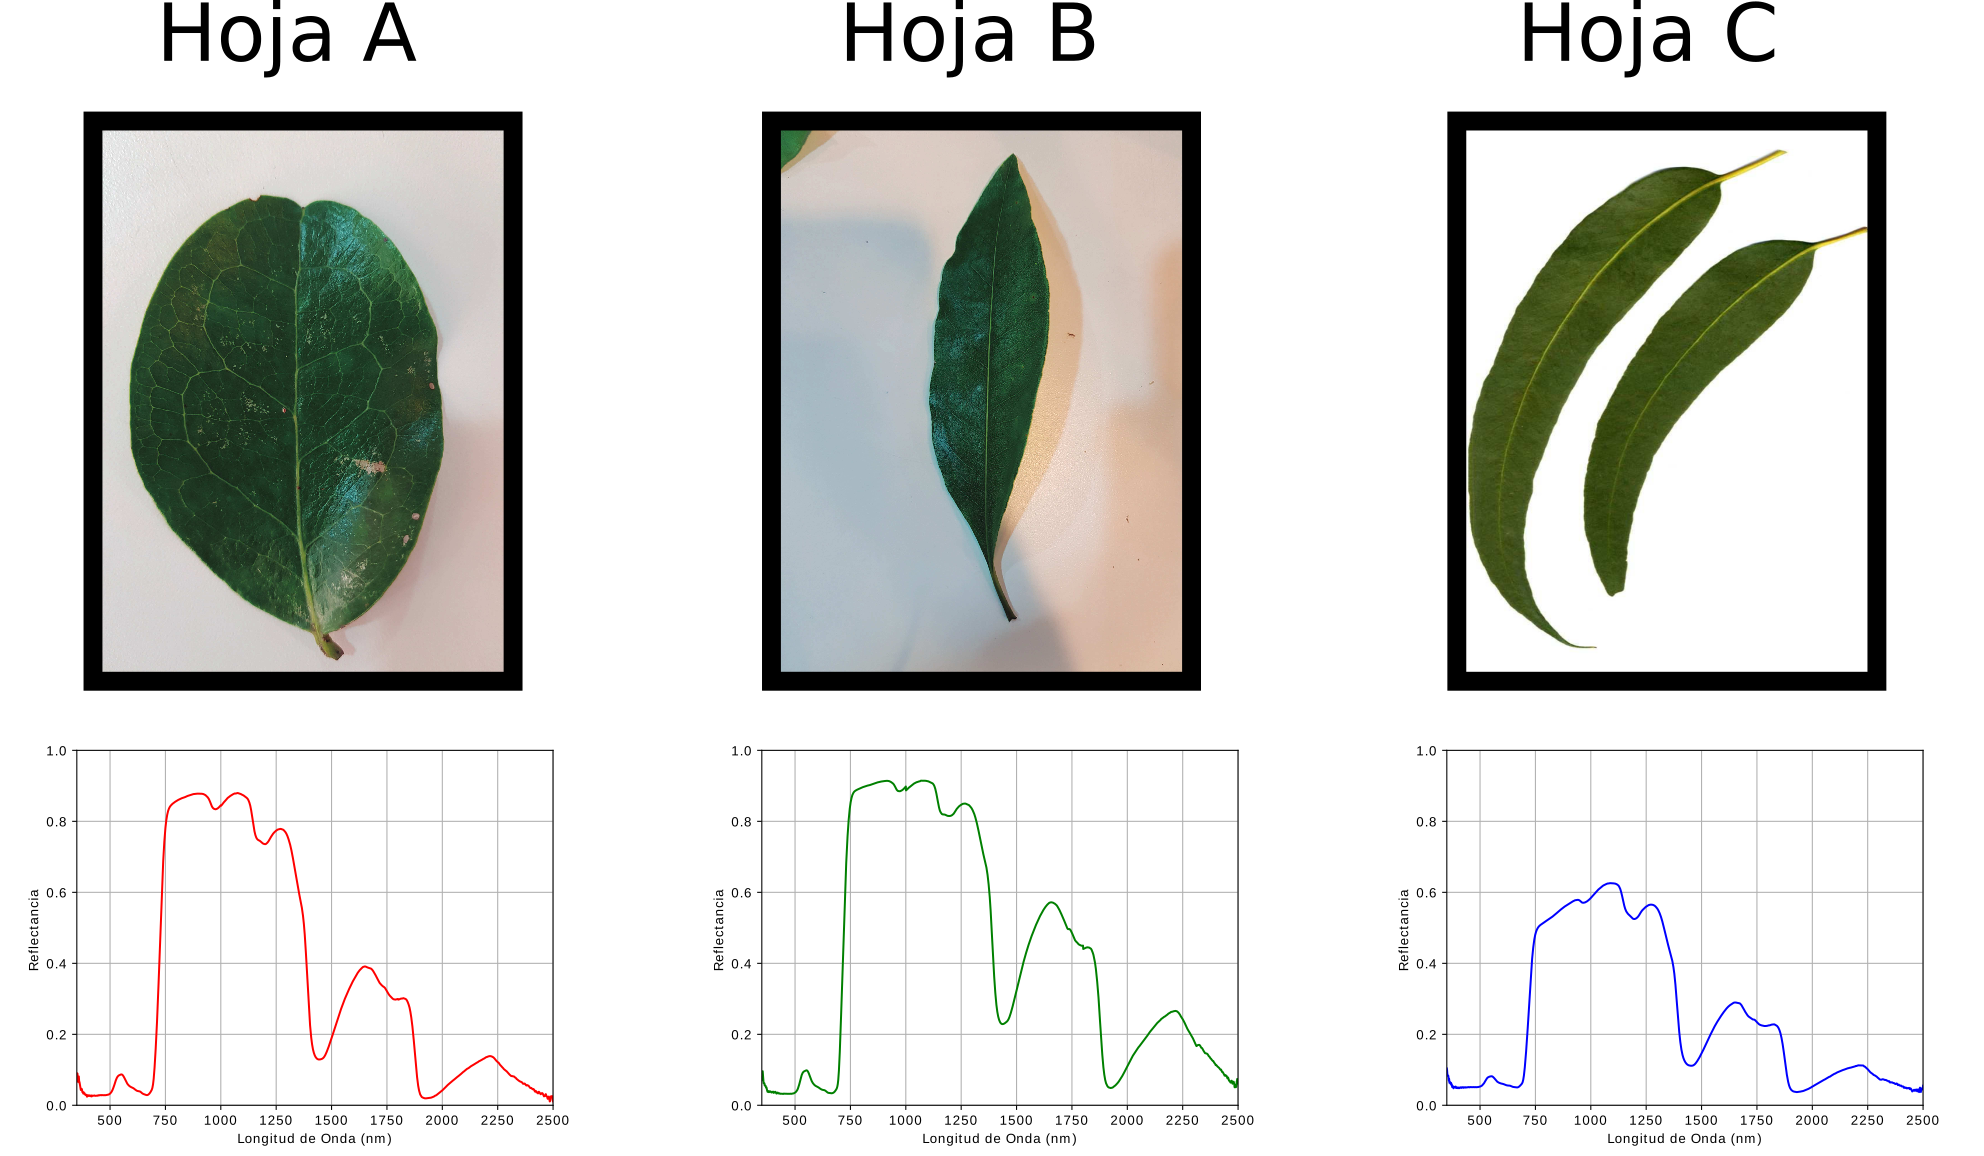

In [2]:
from IPython.display import Image
Image("hojasABC1.png")

## Clasificación

Para clasificar las hojas se emplean dos algoritmos de machine learning (SVM y ANN). Las entradas (features) del clasificador son las bandas en el rango de 350 - 1200 (nm). El 80% de las hojas son usadas como set de entrenamiento, y el 20% restante se emplea como set de prueba. A continuación se presenta el algoritmo para la clasificación de  las hojas y las matrices de confusión. Se debe tener en cuenta que el algoritmo lee los modelos de clasificación previamente entrenados.

#### Importando las librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pywt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers

from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.models import load_model

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import itertools
import pickle

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import sys
sys.path.append("Librerias")
#sys.path.append("Archivos")
from Iniciales import readFile, normalizeData, plot_confusion_matrix




Using TensorFlow backend.


#### Lectura de datos

In [4]:
filename0 = "H1_acom.csv"
filename1 = "H2_acom.csv"
filename2 = "H3_acom.csv"
class_names = ['Hoja A','Hoja B','Eucalyptus']
NBR_TST_DATA = 7
VNIR_NIR_DATA = 2500
ftrVct0 = [] #feature vector 0
ftrVct1 = [] #feature vector 1
rawData1 = [] #raw Data
rawData2 = [] #raw Data
trnData = [] #data used to train
tstData = []  #data to test
lbls = []
accVct = []
val_accVct = []
lossVct = []
val_lossVct = []
epochsVct = []
rawData0 = readFile(filename0)
rawData1 = readFile(filename1)
rawData2 = readFile(filename2)
rawData = np.concatenate((rawData0[:,0:850],rawData1[:,0:850],rawData2[:,0:850]),axis = 0)
normData = normalizeData(*rawData)
lbls = np.concatenate((np.zeros((len(rawData0[:,0:850]),1)),np.ones((len(rawData1[:,0:850]),1)), 2*np.ones((len(rawData2[:,0:850]),1))),axis=0)
x_train, x_test, y_train, y_test = train_test_split(normData, lbls, test_size=0.2, random_state=0)
x_train = np.expand_dims(x_train,2)
x_val = np.expand_dims(x_test,2)

#### Importando los modelos y clasificando

Confusion matrix, without normalization
Confusion matrix, without normalization


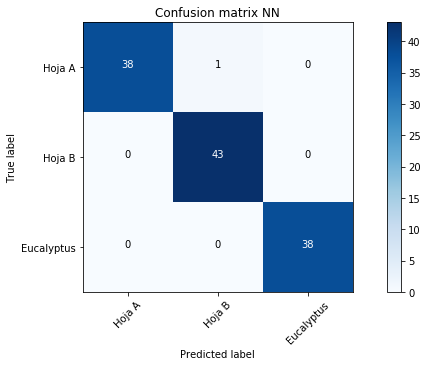

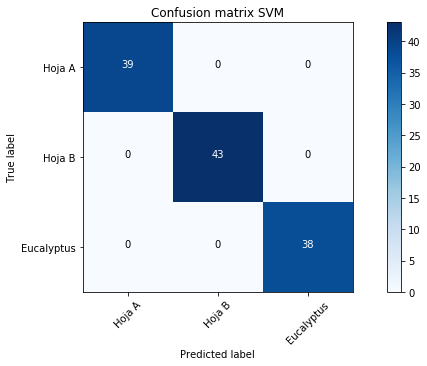

In [5]:
model = load_model('my_modelyo.h5')
datos = model.predict(x_val)
y_pred = np.argmax(datos, axis = 1)
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (10,5)
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix NN')

# Leyendo el SVM previamente entrenado
with open('SVM_tra.pkl', 'rb') as f:
        clf = pickle.load(f)
        
trnScore = clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, trnScore)

plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix SVM')


# Estimación

La estimación del espectro se la realiza con técnicas de regresión basadas en machine learning, las técnicas son: Kernel Ridge Regression, Random Forest y Artificial Neural Network. Como entrada se tiene 23 características estadísticas, las cuales se obtienen al aplicar la transformada wavelet al rango de 350-1200 (nm), posteriormente se obtiene una estimación del espectro en el rango de 1200 - 2500 (nm). A continuación, se presentan los resultados obtenidos en la estimación para las 3 hojas con las 3 regresiones.

#### Predicción de la hoja la A

In [6]:
RE1 = pd.read_csv("H1_acom.csv")
RE1 = np.asarray(RE1)
KR1 = pd.read_csv("KR_pred1.csv")
KR1 = np.asarray(KR1)
RF1 = pd.read_csv("RF_pred1.csv")
RF1 = np.asarray(RF1)
NN1 = pd.read_csv("NN_pred1.csv")
NN1 = np.asarray(NN1)

def fd1(hoja):
    fig = plt.show()
    plt.rcParams['figure.figsize'] = (20,10)
    p1, = plt.plot(range(350,2500),RE1[:,121+hoja])
    p2, = plt.plot(range(350,2500),KR1[:,hoja])
    p3, = plt.plot(range(350,2500),RF1[:,hoja])
    p4, = plt.plot(range(350,2500),NN1[:,hoja])
    plt.axis([350, 2500, 0, 1])
    plt.grid(True)
    plt.legend([p1, p2, p3, p4], ["Real", "KRR", "RF","NN"])

Seleccionar una hoja

In [7]:
interact(fd1, hoja=widgets.IntSlider(min=1,max=60,step=1,value=35));

interactive(children=(IntSlider(value=35, description='hoja', max=60, min=1), Output()), _dom_classes=('widget…

#### Predicción de la hoja la B

In [8]:
RE2 = pd.read_csv("H2_acom.csv")
RE2 = np.asarray(RE2)
KR2 = pd.read_csv("KR_pred2.csv")
KR2 = np.asarray(KR2)
RF2 = pd.read_csv("RF_pred2.csv")
RF2 = np.asarray(RF2)
NN2 = pd.read_csv("NN_pred2.csv")
NN2 = np.asarray(NN2)

def fd2(hoja):
    fig = plt.show()
    plt.rcParams['figure.figsize'] = (20,10)
    p1, = plt.plot(range(350,2500),RE1[:,121+hoja])
    p2, = plt.plot(range(350,2500),KR1[:,hoja])
    p3, = plt.plot(range(350,2500),RF1[:,hoja])
    p4, = plt.plot(range(350,2500),NN1[:,hoja])
    plt.axis([350, 2500, 0, 1])
    plt.grid(True)
    plt.legend([p1, p2, p3, p4], ["Real", "KRR", "RF","NN"])
    return hoja

Seleccionar una hoja

In [9]:
interact(fd2, hoja=widgets.IntSlider(min=1,max=60,step=1,value=54));

interactive(children=(IntSlider(value=54, description='hoja', max=60, min=1), Output()), _dom_classes=('widget…

#### Predicción de la hoja de Eucalyptus

In [10]:
RE3 = pd.read_csv("H3_acom.csv")
RE3 = np.asarray(RE3)
KR3 = pd.read_csv("KR_pred3.csv")
KR3 = np.asarray(KR3)
RF3 = pd.read_csv("RF_pred3.csv")
RF3 = np.asarray(RF3)
NN3 = pd.read_csv("NN_pred3.csv")
NN3 = np.asarray(NN3)

def fd3(hoja):
    fig = plt.show()
    plt.rcParams['figure.figsize'] = (20,10)
    p1, = plt.plot(range(350,2500),RE3[:,121+hoja])
    p2, = plt.plot(range(350,2500),KR3[:,hoja])
    p3, = plt.plot(range(350,2500),RF3[:,hoja])
    p4, = plt.plot(range(350,2500),NN3[:,hoja])
    plt.axis([350, 2500, 0, 0.8])
    plt.grid(True)
    plt.legend([p1, p2, p3, p4], ["Real", "KRR", "RF","NN"])
    return hoja

Seleccionar una hoja

In [11]:
interact(fd3, hoja=widgets.IntSlider(min=1,max=60,step=1,value=18));

interactive(children=(IntSlider(value=18, description='hoja', max=60, min=1), Output()), _dom_classes=('widget…

#### Ánalisis del error de estimación

La caracterización del error se la realiza por medio de un histograma, se observa que el "bin" más grande en todos los casos es aquel que se encuentra al rededor de error 0. Además, considerando las tres técnicas de regresión presentadas, KRR es que el que tiende a mantener un menor error.

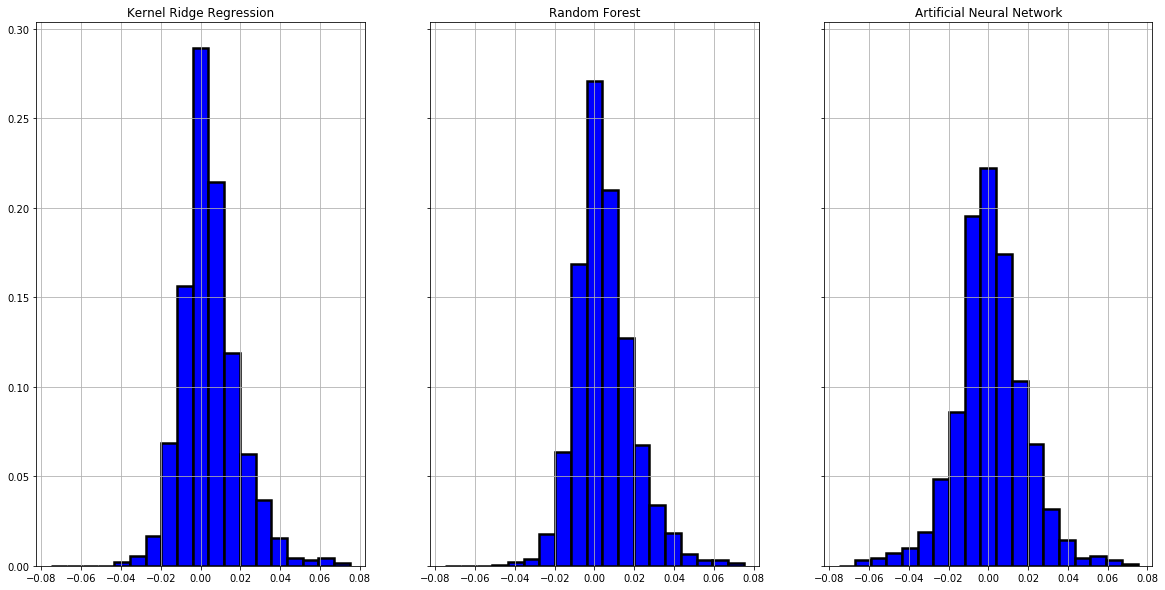

In [11]:
seakr = RE1[850:,121:199] - KR1[850:,:]
searf = RE1[850:,121:199] - RF1[850:,:]
seann = RE1[850:,121:199] - NN1[850:,:]

seakr = np.squeeze(seakr.reshape(1,-1))
searf = np.squeeze(searf.reshape(1,-1))
seann = np.squeeze(seann.reshape(1,-1))
weights = np.ones_like(seakr)/float(len(seakr))

num_bins = np.linspace(-0.075,0.075,20, endpoint=True)

_, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
n, bins, patches = ax1.hist(seakr, num_bins, facecolor='blue', weights=weights, edgecolor='black', linewidth=2.5)
ax1.set_title("Kernel Ridge Regression")
ax1.grid()
n, bins, patches = ax2.hist(searf, num_bins, facecolor='blue', weights=weights, edgecolor='black', linewidth=2.5)
ax2.set_title("Random Forest")
ax2.grid()
n, bins, patches = ax3.hist(seann, num_bins, facecolor='blue', weights=weights, edgecolor='black', linewidth=2.5)
ax3.set_title("Artificial Neural Network")
ax3.grid()

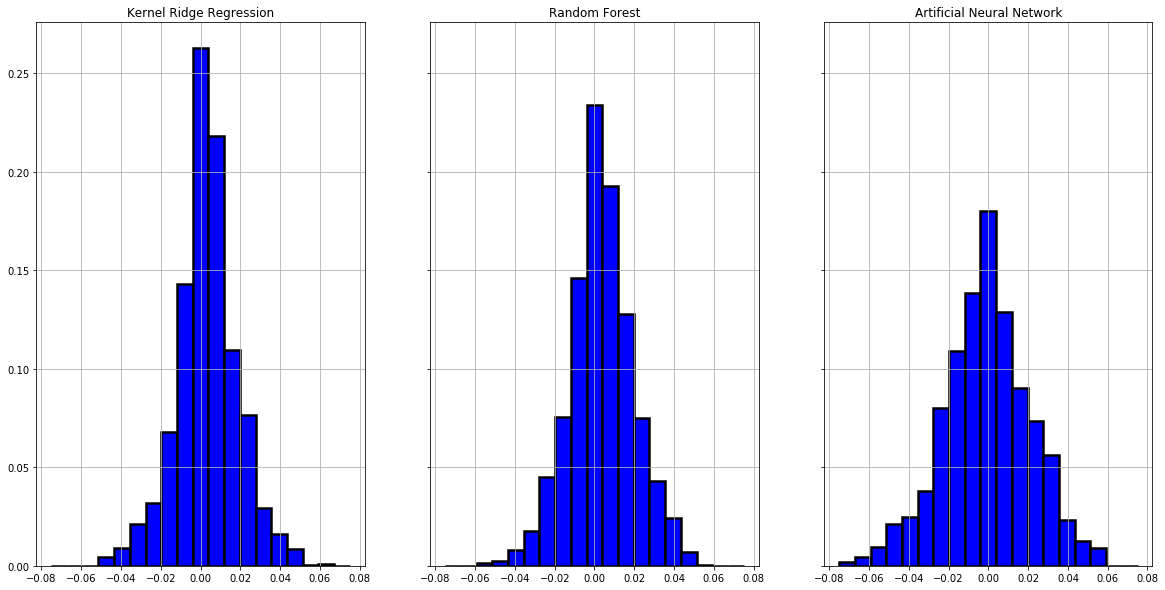

In [12]:
seakr = RE2[850:,121:199] - KR2[850:,:]
searf = RE2[850:,121:199] - RF2[850:,:]
seann = RE2[850:,121:199] - NN2[850:,:]

seakr = np.squeeze(seakr.reshape(1,-1))
searf = np.squeeze(searf.reshape(1,-1))
seann = np.squeeze(seann.reshape(1,-1))
weights = np.ones_like(seakr)/float(len(seakr))

num_bins = np.linspace(-0.075,0.075,20, endpoint=True)

_, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
n, bins, patches = ax1.hist(seakr, num_bins, facecolor='blue', weights=weights, edgecolor='black', linewidth=2.5)
ax1.set_title("Kernel Ridge Regression")
ax1.grid()
n, bins, patches = ax2.hist(searf, num_bins, facecolor='blue', weights=weights, edgecolor='black', linewidth=2.5)
ax2.set_title("Random Forest")
ax2.grid()
n, bins, patches = ax3.hist(seann, num_bins, facecolor='blue', weights=weights, edgecolor='black', linewidth=2.5)
ax3.set_title("Artificial Neural Network")
ax3.grid()

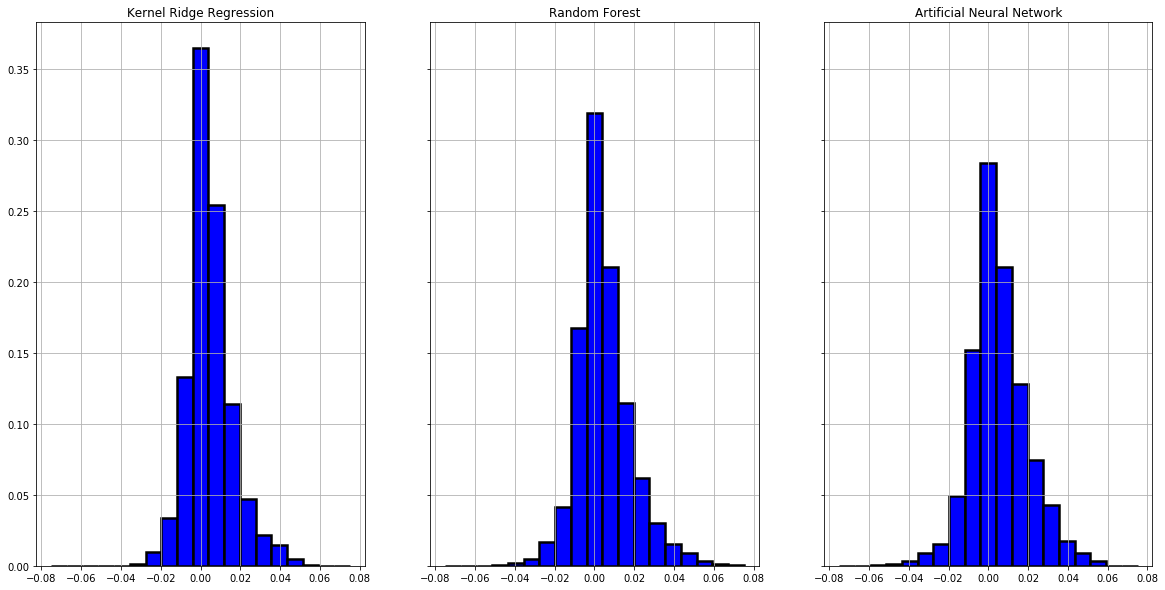

In [13]:
seakr = RE3[850:,121:199] - KR3[850:,:]
searf = RE3[850:,121:199] - RF3[850:,:]
seann = RE3[850:,121:199] - NN3[850:,:]

seakr = np.squeeze(seakr.reshape(1,-1))
searf = np.squeeze(searf.reshape(1,-1))
seann = np.squeeze(seann.reshape(1,-1))
weights = np.ones_like(seakr)/float(len(seakr))

num_bins = np.linspace(-0.075,0.075,20, endpoint=True)

_, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
n, bins, patches = ax1.hist(seakr, num_bins, facecolor='blue', weights=weights, edgecolor='black', linewidth=2.5)
ax1.set_title("Kernel Ridge Regression")
ax1.grid()
n, bins, patches = ax2.hist(searf, num_bins, facecolor='blue', weights=weights, edgecolor='black', linewidth=2.5)
ax2.set_title("Random Forest")
ax2.grid()
n, bins, patches = ax3.hist(seann, num_bins, facecolor='blue', weights=weights, edgecolor='black', linewidth=2.5)
ax3.set_title("Artificial Neural Network")
ax3.grid()

# Conclusión

* La clasificación a través de SVM y ANN es exitosa, especialmente mediante SVM en donde se logra clasificar todas las hojas de manera correcta. Por otra parte, ANN clasifica incorrectamente una hoja de un conjunto de pruebas de 120 hojas. Por lo tanto, para esta aplicación en particular se puede utilizar SVM y ANN como allgoritmos de clasificación.

* Las hojas logran ser clasificadas correctamente ya que el espacio de características de cada hoja se encuentra lo suficientemente alejado. Por lo tanto, los algortimos de SVM y ANN logran discriminar facilmente cada hoja. 

* Los algoritmos KRR, RF y ANN lograron estimar el espectro desde los 1200nm hasta los 2500nm sin embargo, no todas las estimaciones pueden utilizarce. Por ejemplo, ANN estima el valor medio del espectro, es decir  siempre entrega una misma estimación a pesar que las  características de entrada son distintas debido a esto, no es recomendable usar ANN para la estimación. Por otra parte, KRR y RF no presentan este "error" ya que para distintas características de entrada entregan una estimación del espectro diferente.

* El algoritmo que genera la mejor estimación es el KRR ya que es el estimador con menor sesgo y de mínima varianza. Esto se puede visualizar en el histograma de errores, en donde la mayor cantidad de errores son cercanos a cero (menor sesgo) y es el histograma con la menor base (menor varianza).